# Credit Card Fraud Detection

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import  RandomUnderSampler
from collections import Counter
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## Importing data


In [2]:
train=pd.read_csv(r"train.csv")
val=pd.read_csv(r"val.csv")

## Inspecting Datasets


In [3]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,170884.0,94966.107886,47464.723773,0.000000,54348.000000,84923.500000,139404.000000,172792.000000
V1,170884.0,-0.001070,1.958944,-46.855047,-0.922071,0.016603,1.316250,2.451888
V2,170884.0,-0.000904,1.650481,-63.344698,-0.599127,0.065839,0.802518,22.057729
V3,170884.0,-0.002722,1.521820,-48.325589,-0.896376,0.177007,1.028302,4.226108
V4,170884.0,-0.002603,1.416490,-5.683171,-0.848978,-0.020895,0.738812,16.875344
V5,170884.0,0.000151,1.394123,-113.743307,-0.691840,-0.054185,0.612154,34.099309
V6,170884.0,0.000779,1.338331,-23.496714,-0.768986,-0.274228,0.400359,73.301626
V7,170884.0,-0.000811,1.260122,-43.557242,-0.554440,0.040417,0.569221,120.589494
V8,170884.0,-0.002327,1.208709,-73.216718,-0.209596,0.021461,0.326026,18.282168
V9,170884.0,-0.000622,1.098393,-13.434066,-0.642036,-0.051777,0.595095,10.392889


- I noticed from using **train.describe().T** that there are outliers in all of the data, suggesting that the values might be extremely large or that there could be an issue with the data distribution that needs further inspection or preprocessing.

## Cleaning Data

### Check null values

In [6]:
train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Check outliers values

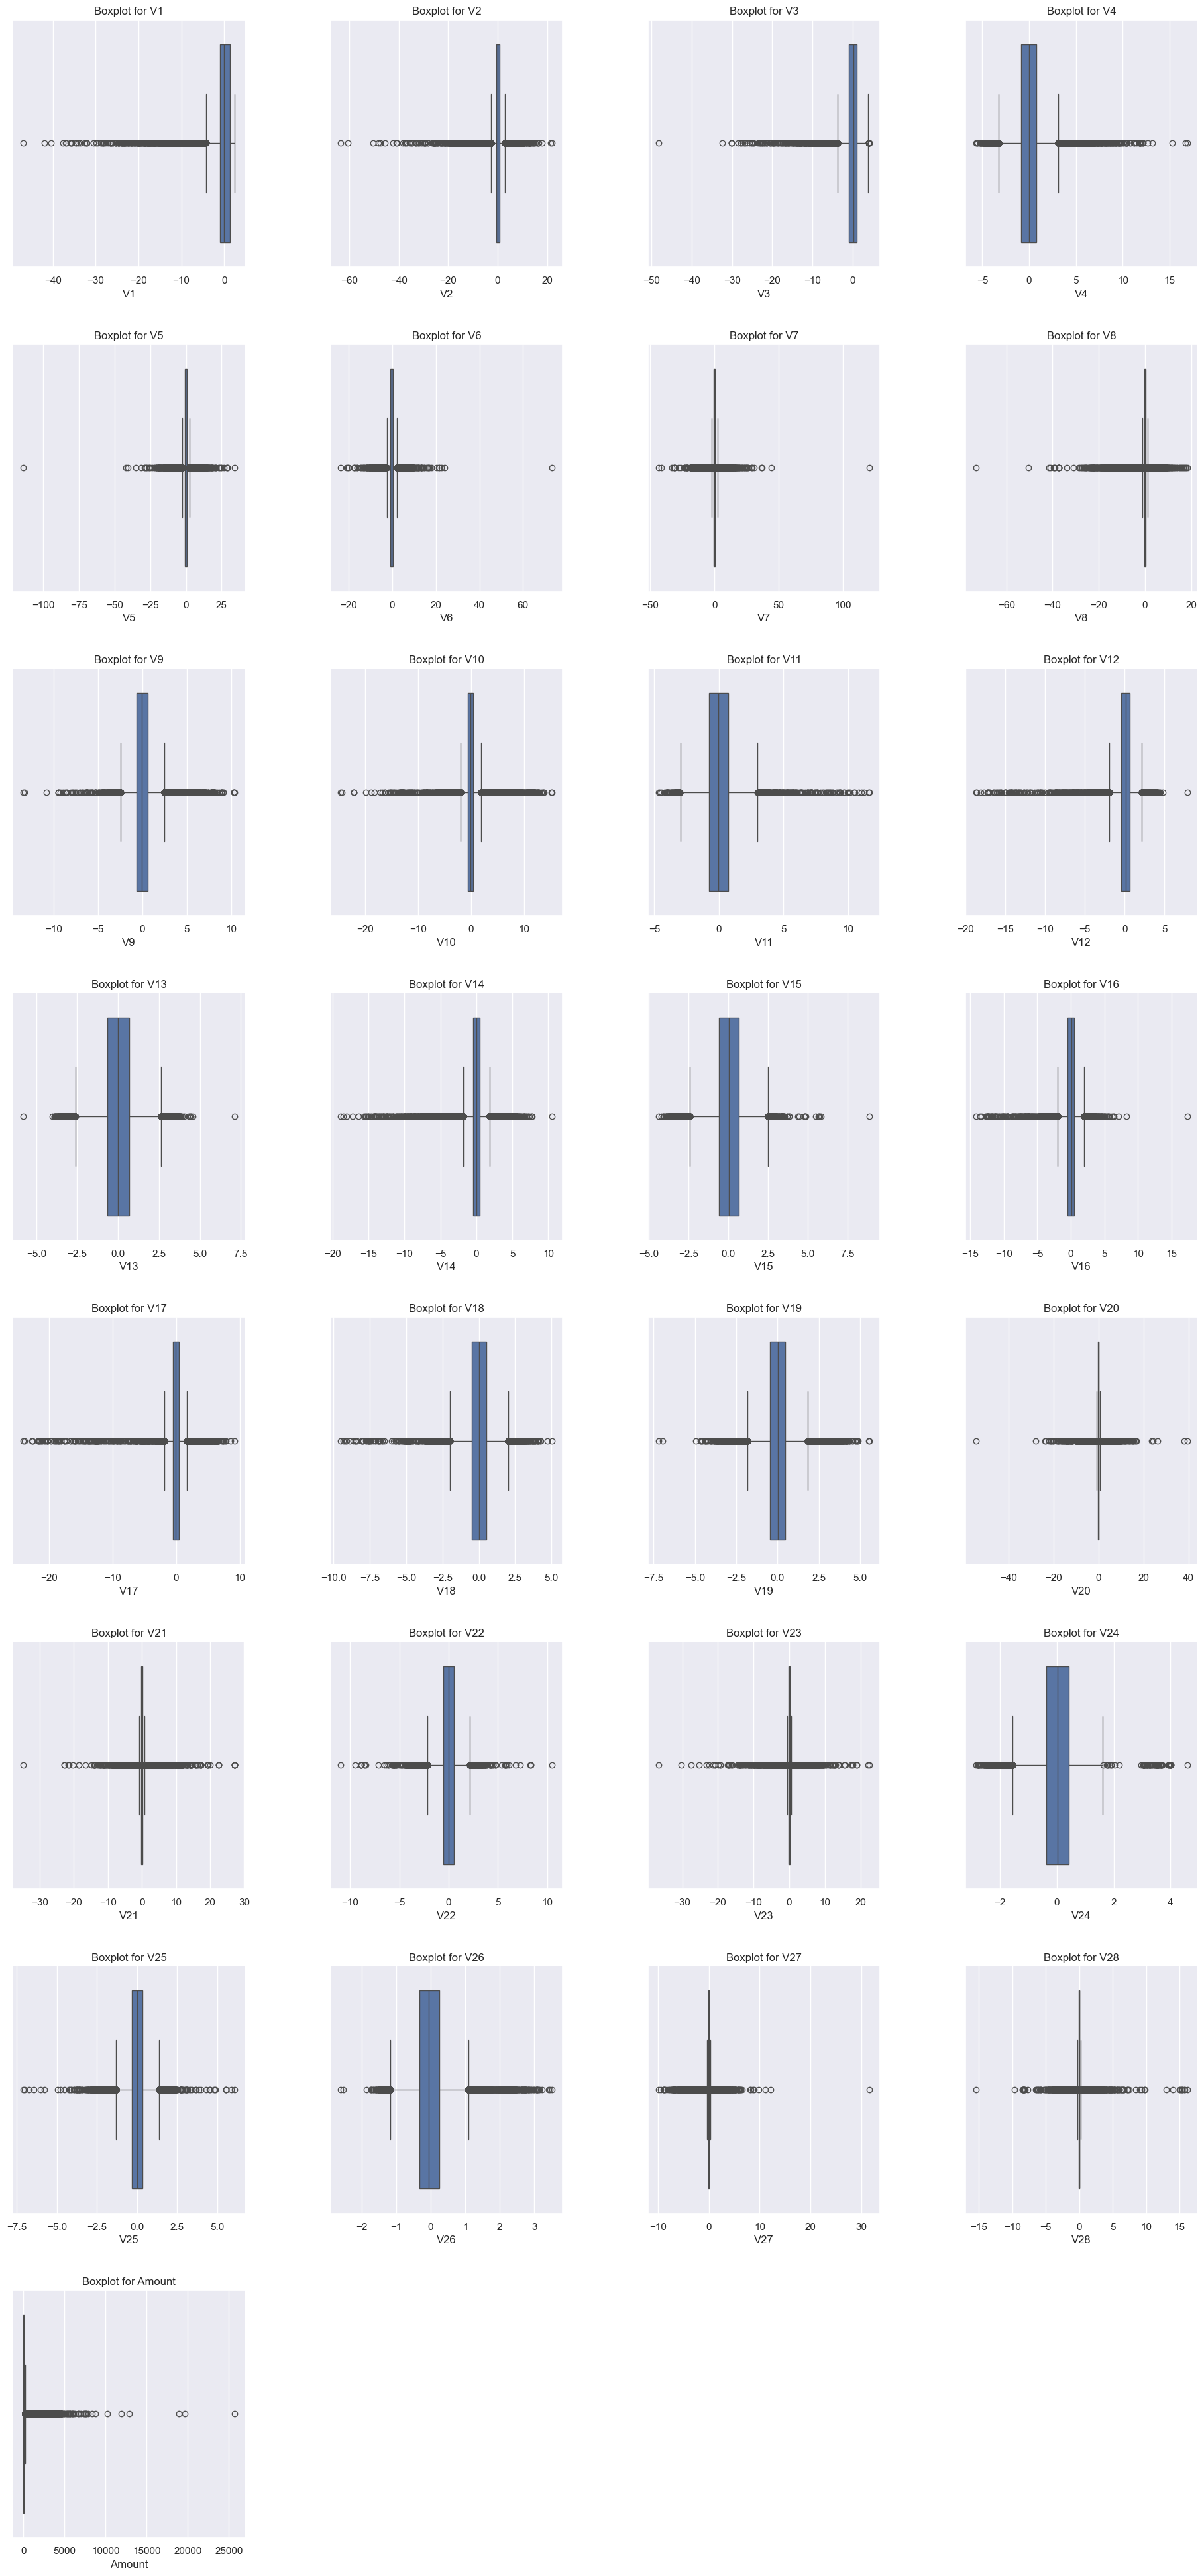

In [7]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

num_features = len(features)
cols = 4
rows = (num_features + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
fig.tight_layout(pad=5)

for i, column in enumerate(features):
    row = i // cols
    col = i % cols

    sns.boxplot(data=train, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot for {column}")

if num_features % cols != 0:
    for j in range(num_features, rows * cols):
        fig.delaxes(axes.flatten()[j])
        
plt.show()

- Visualizing the data reveals that outliers exist in all of the data, which may indicate either inherent data characteristics or potential issues requiring further investigation or preprocessing.


In [8]:
def Choose_procceros(option):
    """
    Function to choose a data processing scaler based on the given option.
    - If option is 1, returns MinMaxScaler.
    - If option is 2, returns StandardScaler.
    Returns: The chosen scaler object.
    """
    if option == 1:
        return MinMaxScaler()
    elif option == 2:
        return StandardScaler()

train_data = train.copy()
val_data = val.copy()

preprocessor = Choose_procceros(2)

# Scale the training data (excluding 'Class')
train_scaled = preprocessor.fit_transform(train.drop('Class', axis=1))

# Scale the validation data (excluding 'Class')
val_scaled = preprocessor.transform(val.drop('Class', axis=1))

# Convert the scaled data back to DataFrame
train = pd.DataFrame(train_scaled, columns=train.drop('Class', axis=1).columns)
val = pd.DataFrame(val_scaled, columns=val.drop('Class', axis=1).columns)

train['Class'] = train_data['Class']
val['Class'] = val_data['Class']

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,170884.0,1.018720e-16,1.000003,-2.000778,-0.855756,-0.211581,0.936233,1.639662
V1,170884.0,3.742237e-18,1.000003,-23.918053,-0.470153,0.009022,0.672467,1.252188
V2,170884.0,-4.740167e-18,1.000003,-38.379092,-0.362454,0.040439,0.486782,13.365008
V3,170884.0,1.846170e-17,1.000003,-31.753424,-0.587229,0.118101,0.677496,2.778805
V4,170884.0,1.530159e-17,1.000003,-4.010326,-0.597518,-0.012914,0.523418,11.915367
V5,170884.0,-1.954279e-18,1.000003,-81.588050,-0.496364,-0.038975,0.438989,24.459287
V6,170884.0,1.559266e-17,1.000003,-17.557360,-0.575169,-0.205485,0.298567,54.770499
V7,170884.0,1.081091e-17,1.000003,-34.565351,-0.439347,0.032718,0.452363,95.697606
V8,170884.0,-1.081091e-18,1.000003,-60.572550,-0.171480,0.019681,0.271657,15.127333
V9,170884.0,-2.494825e-19,1.000003,-12.230124,-0.583958,-0.046572,0.542355,9.462497


## Data Visualization

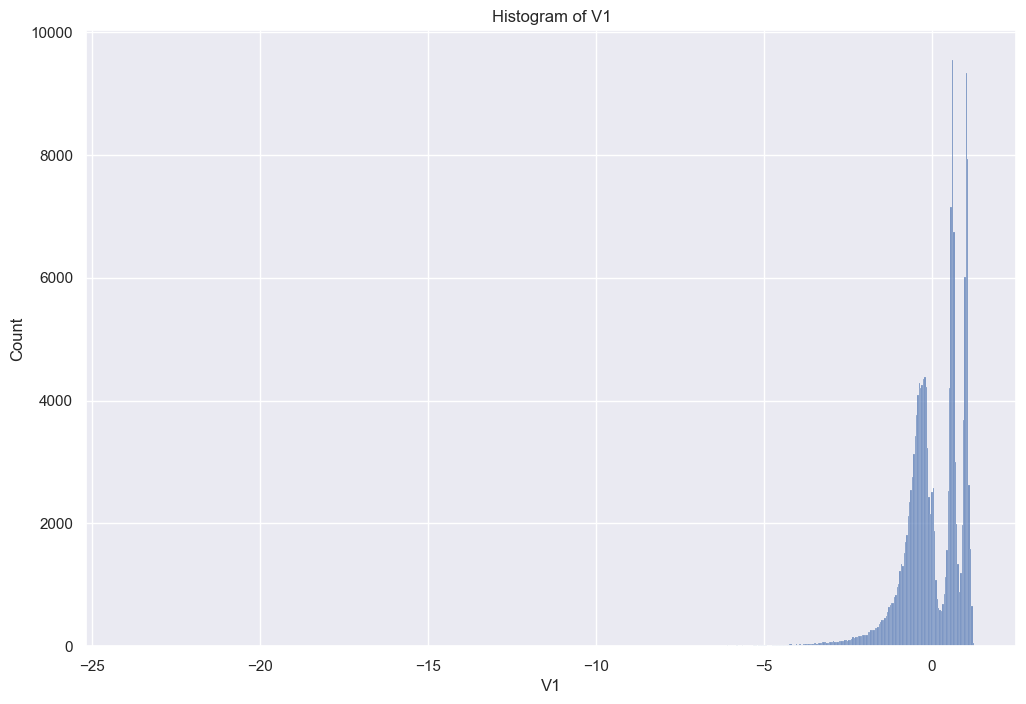

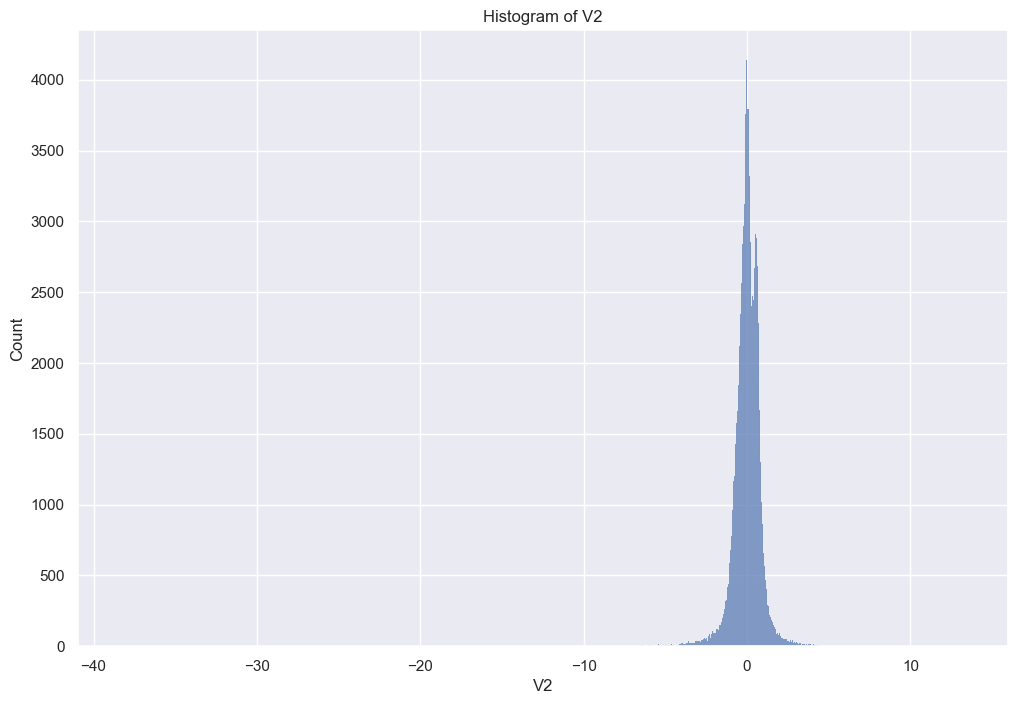

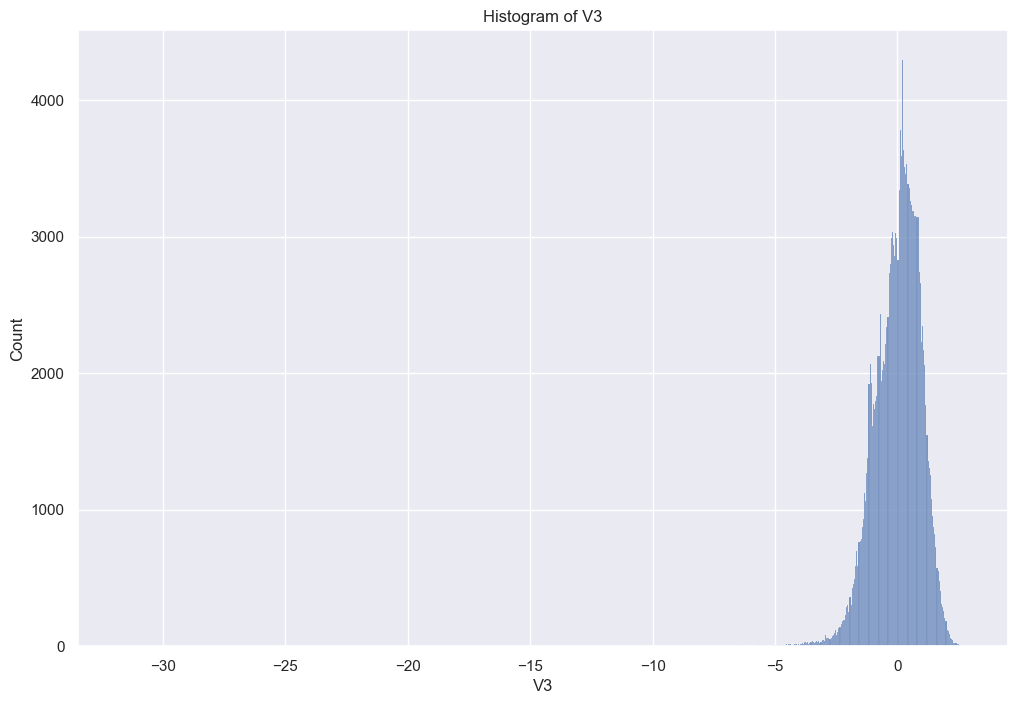

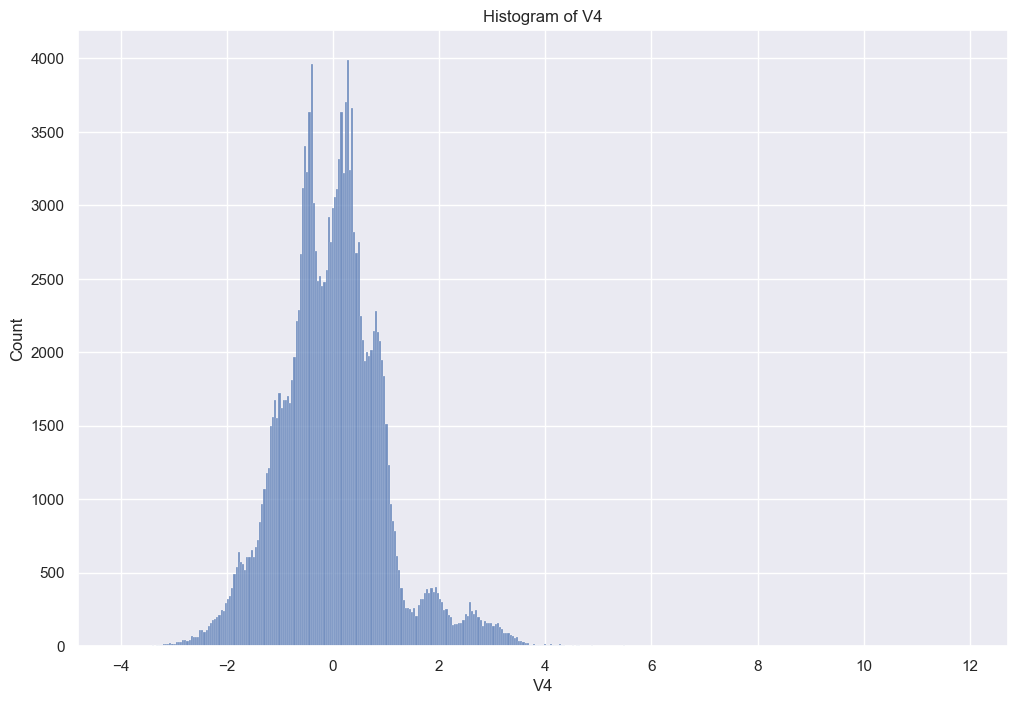

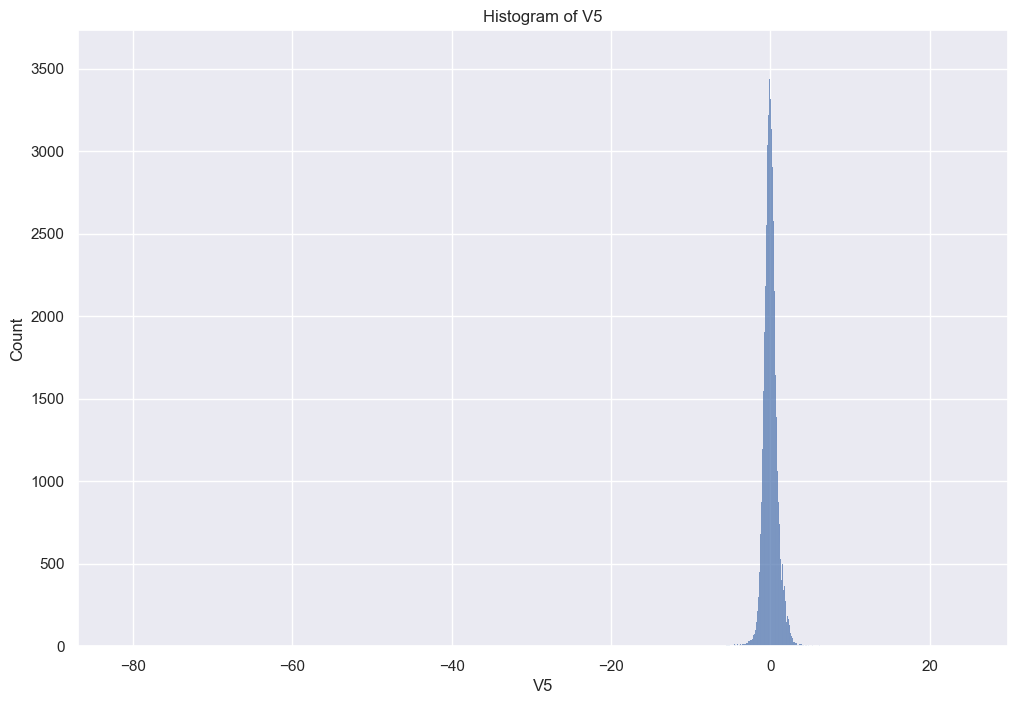

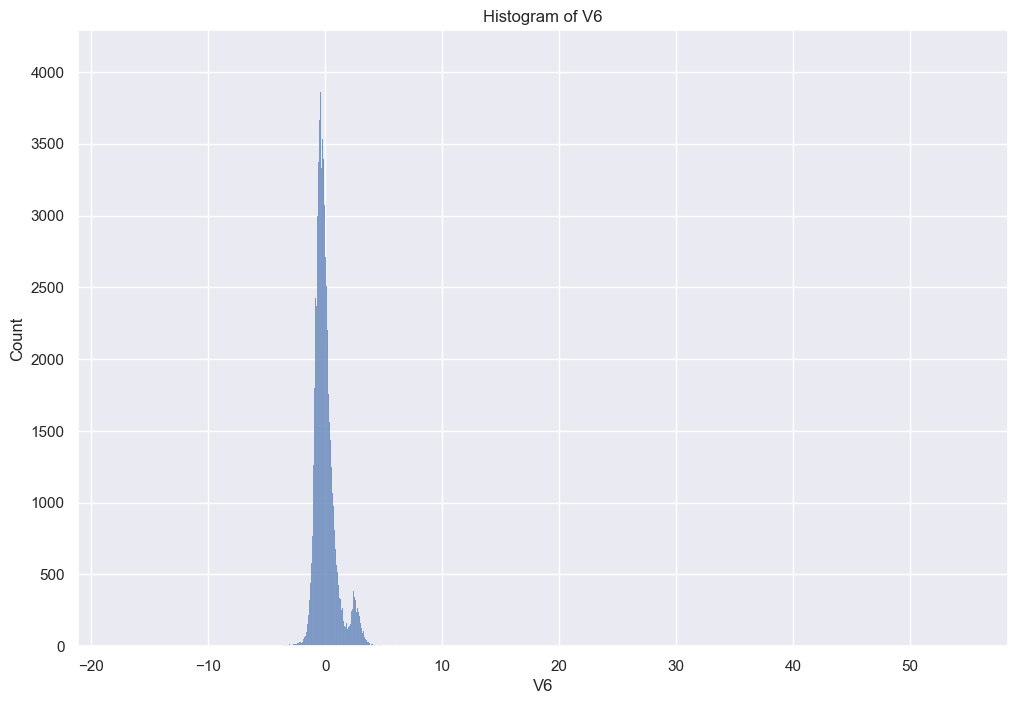

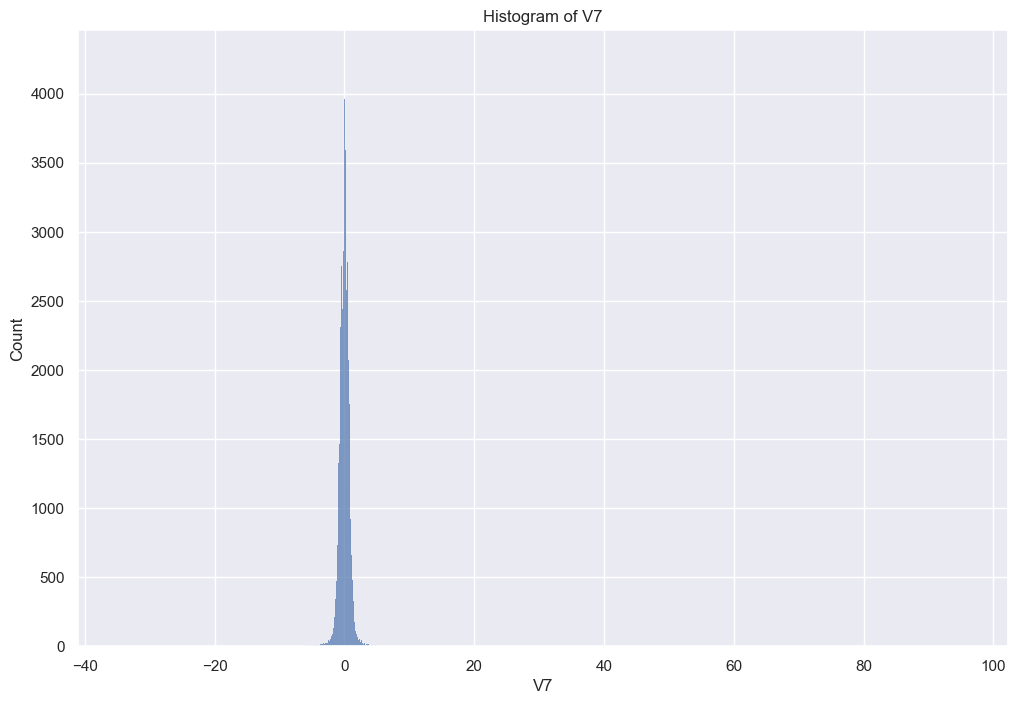

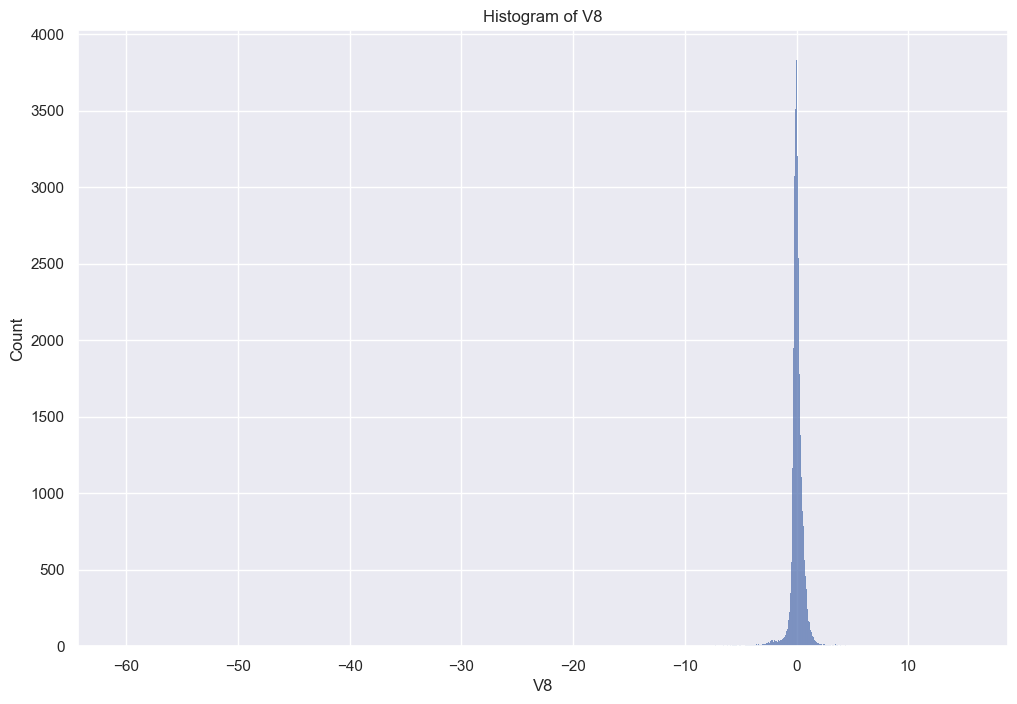

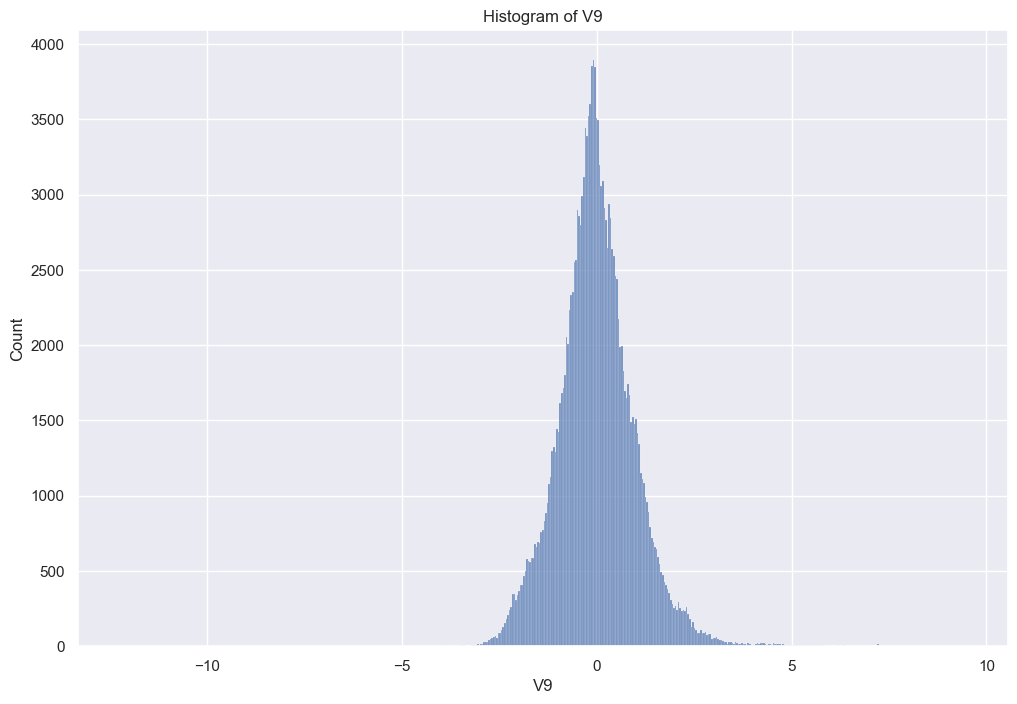

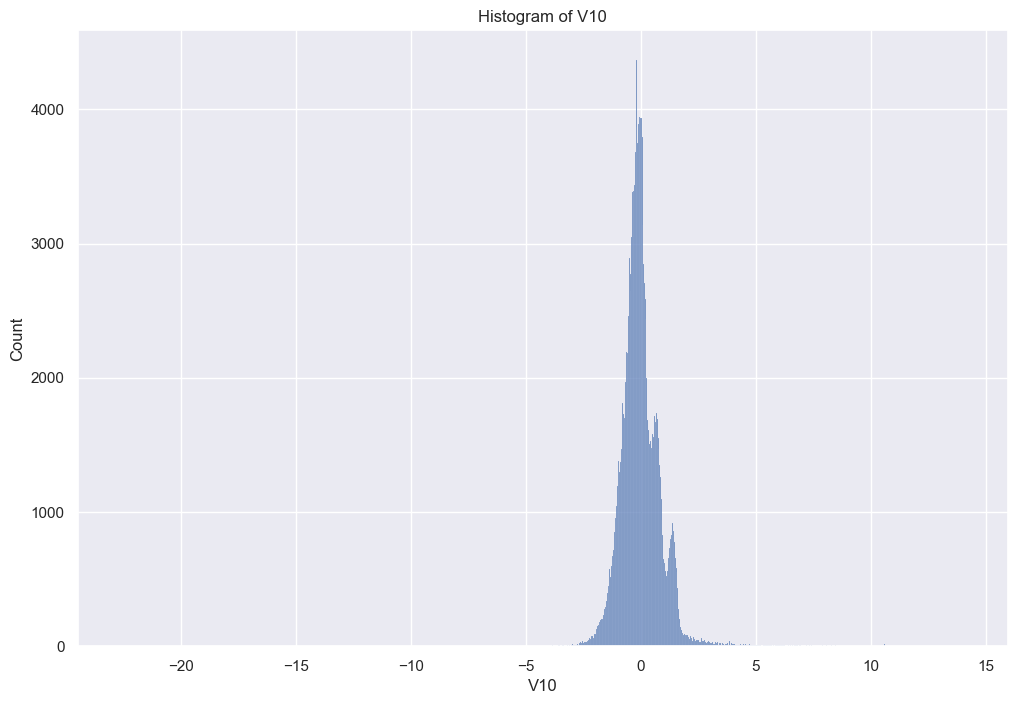

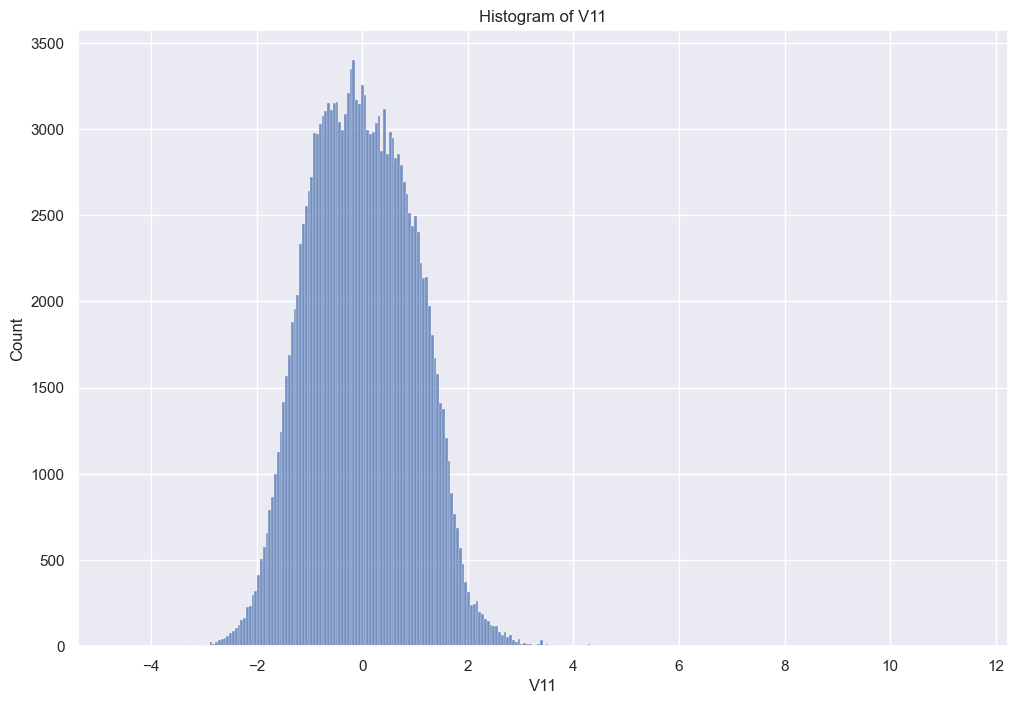

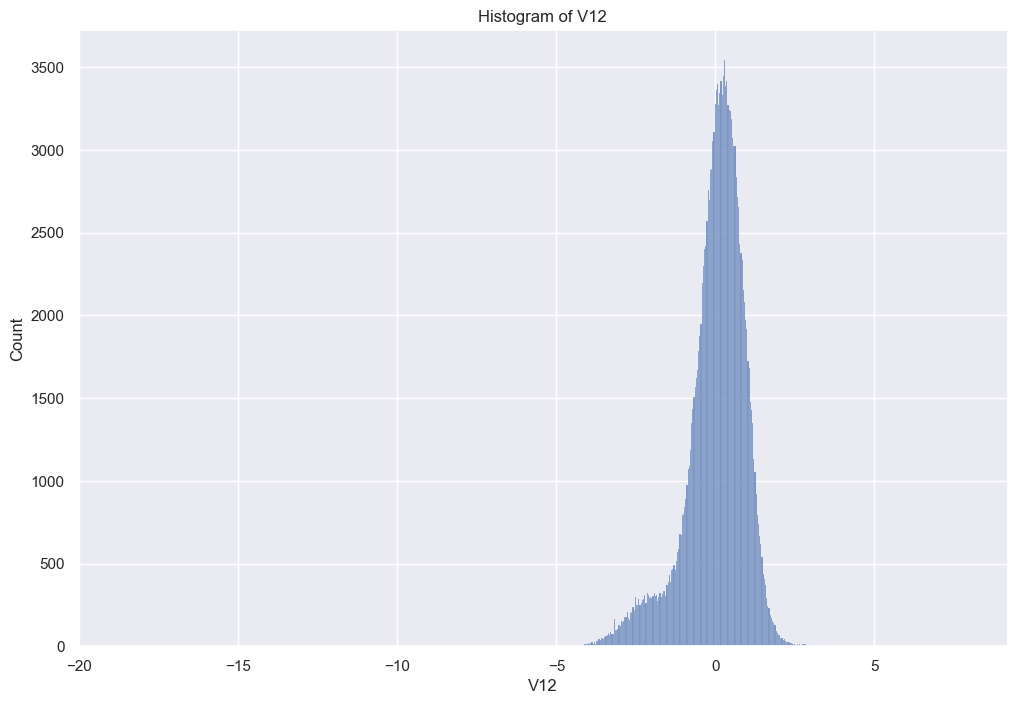

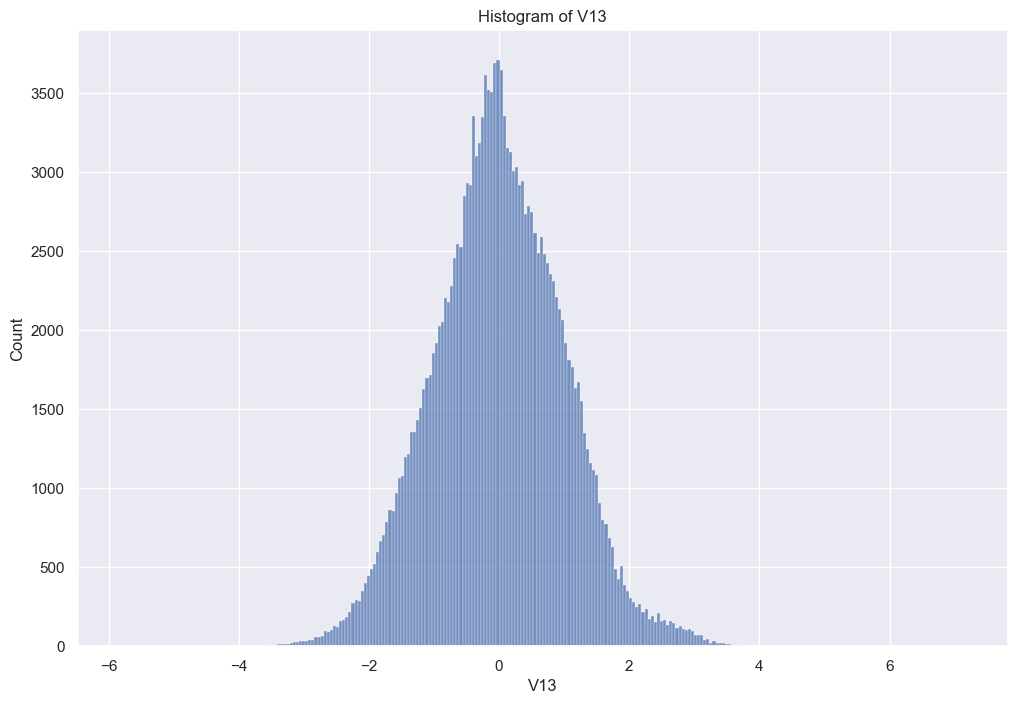

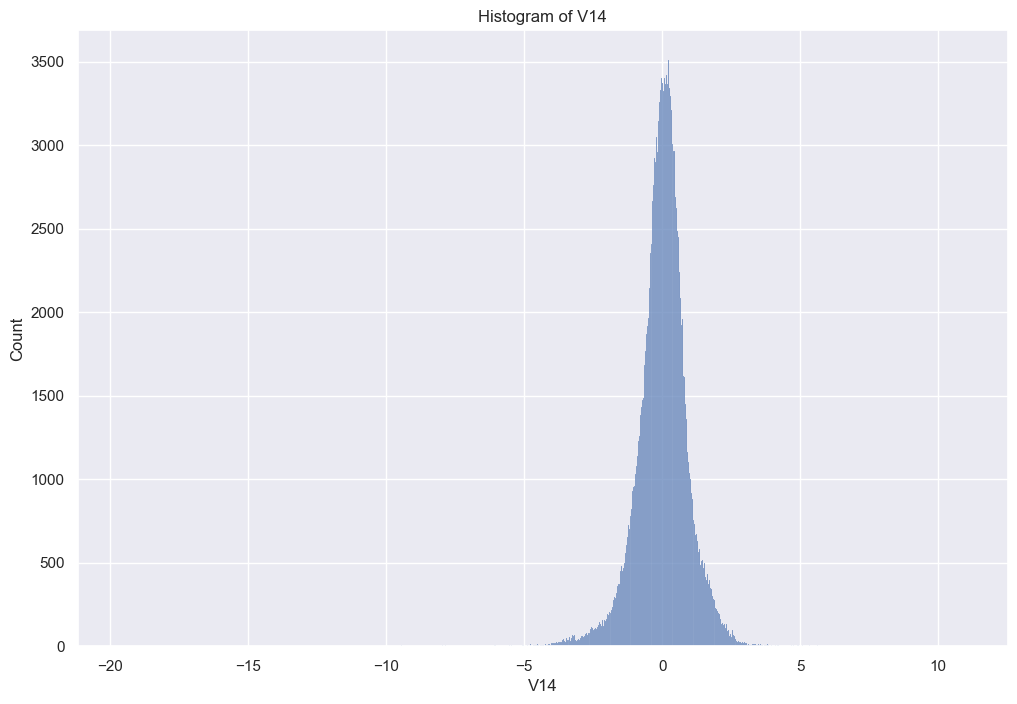

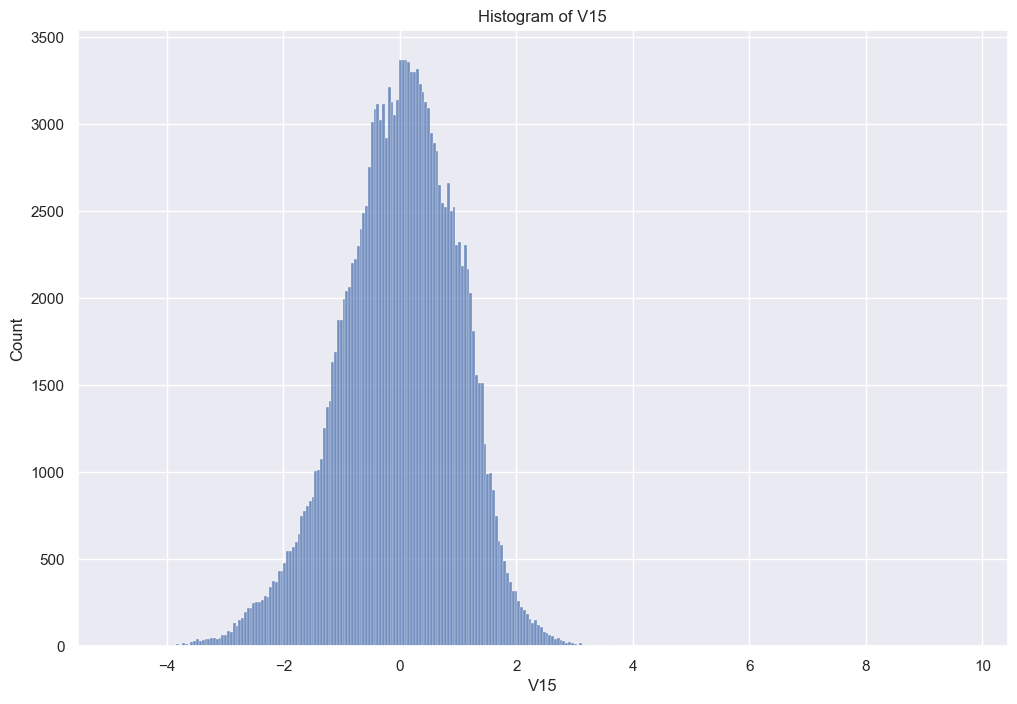

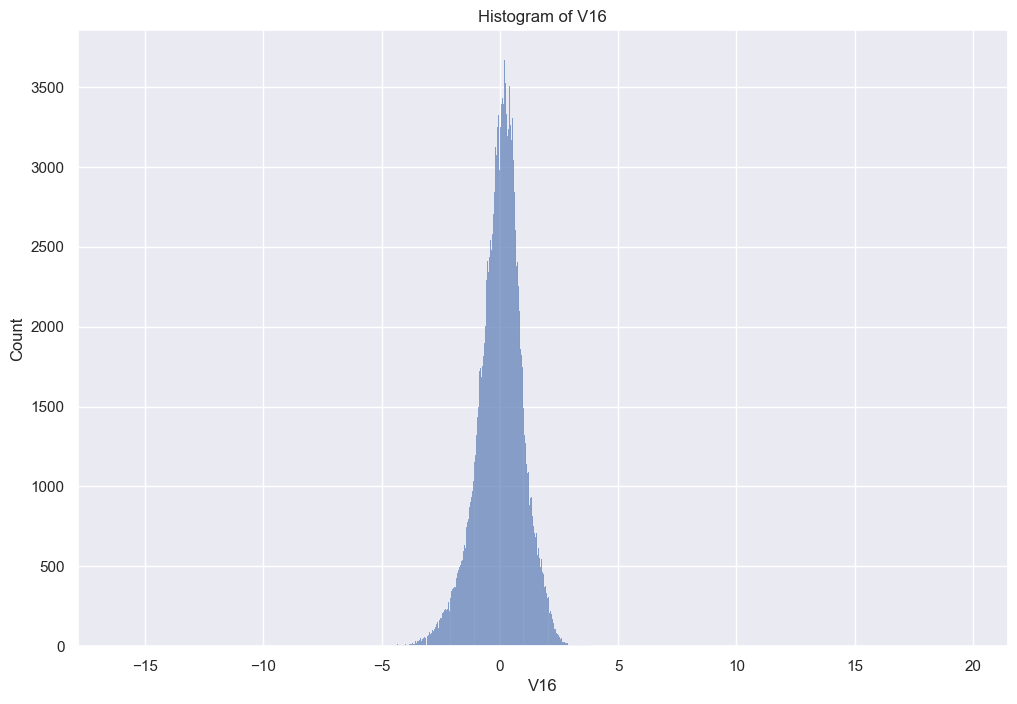

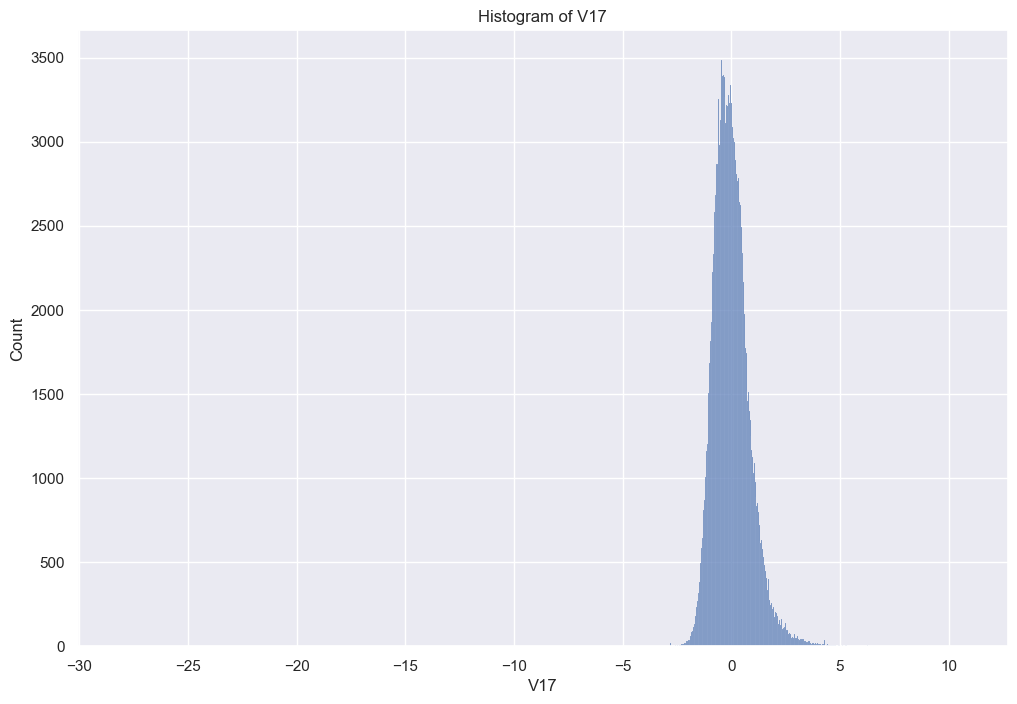

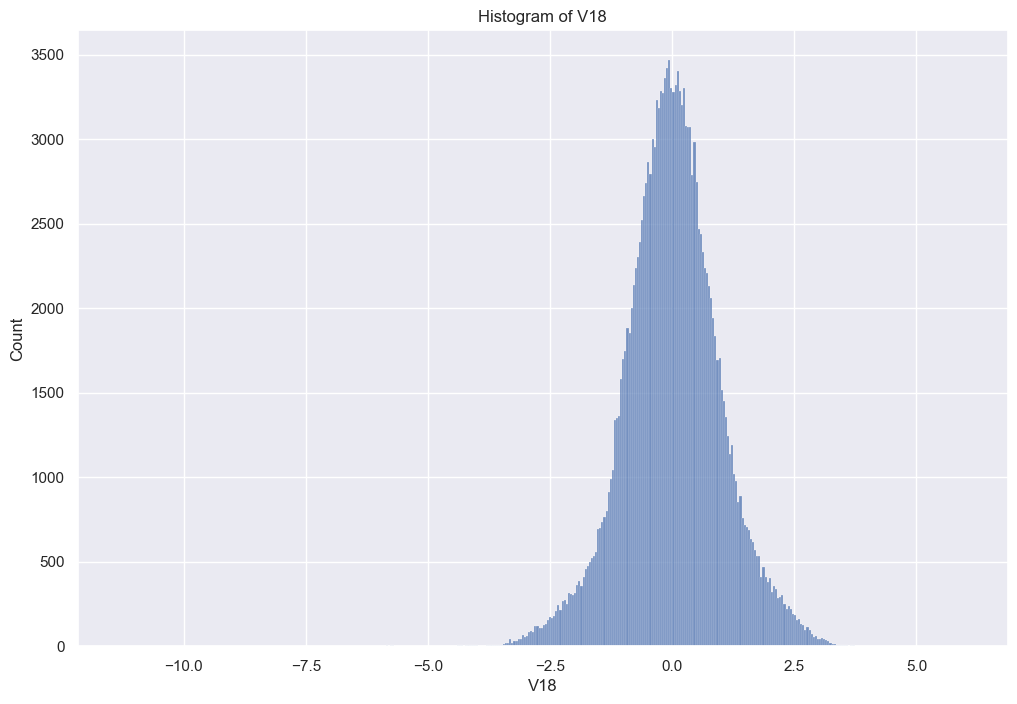

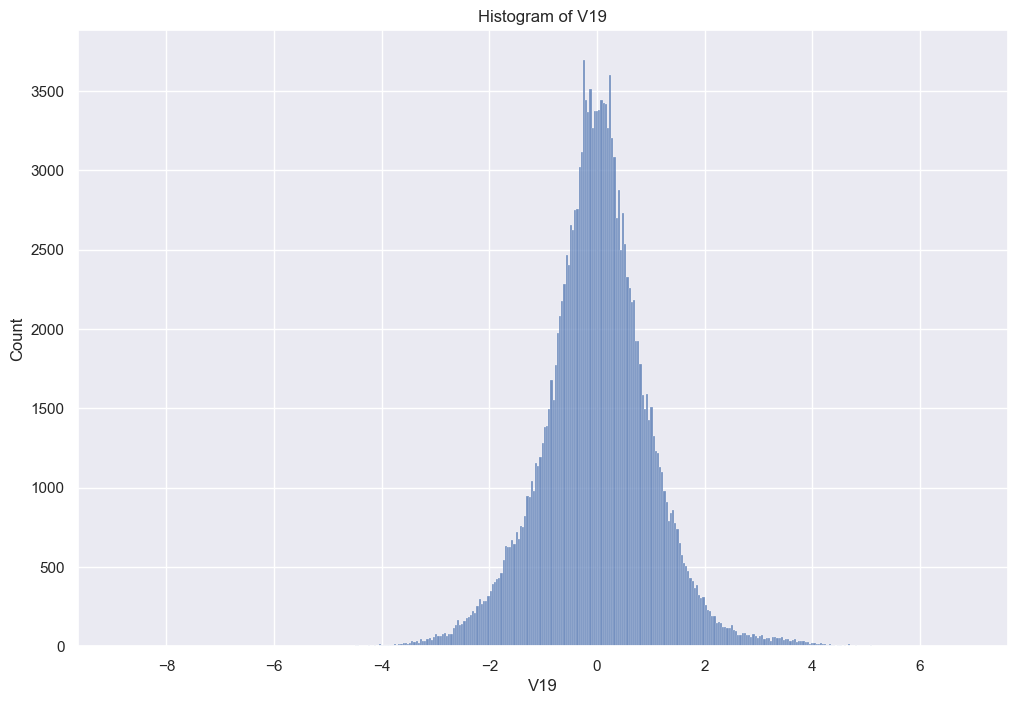

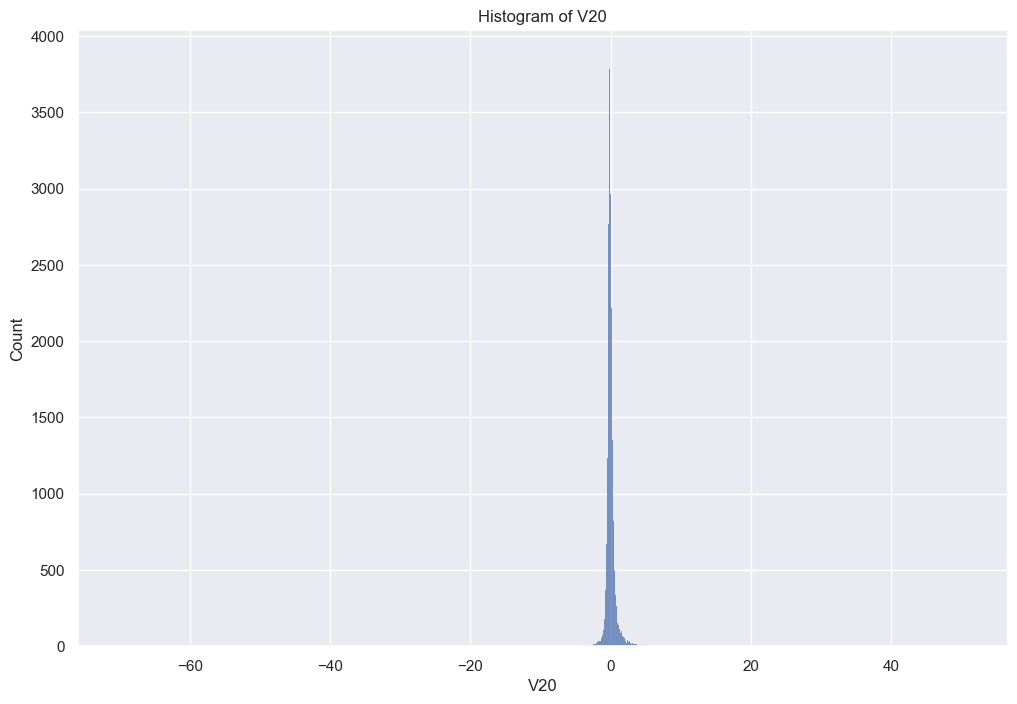

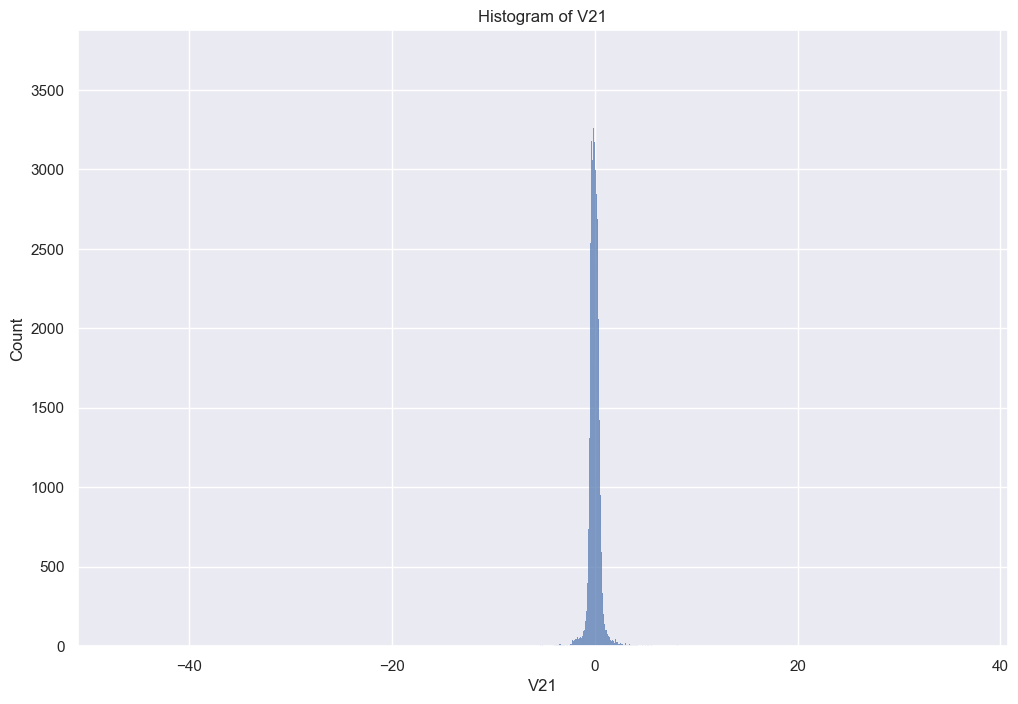

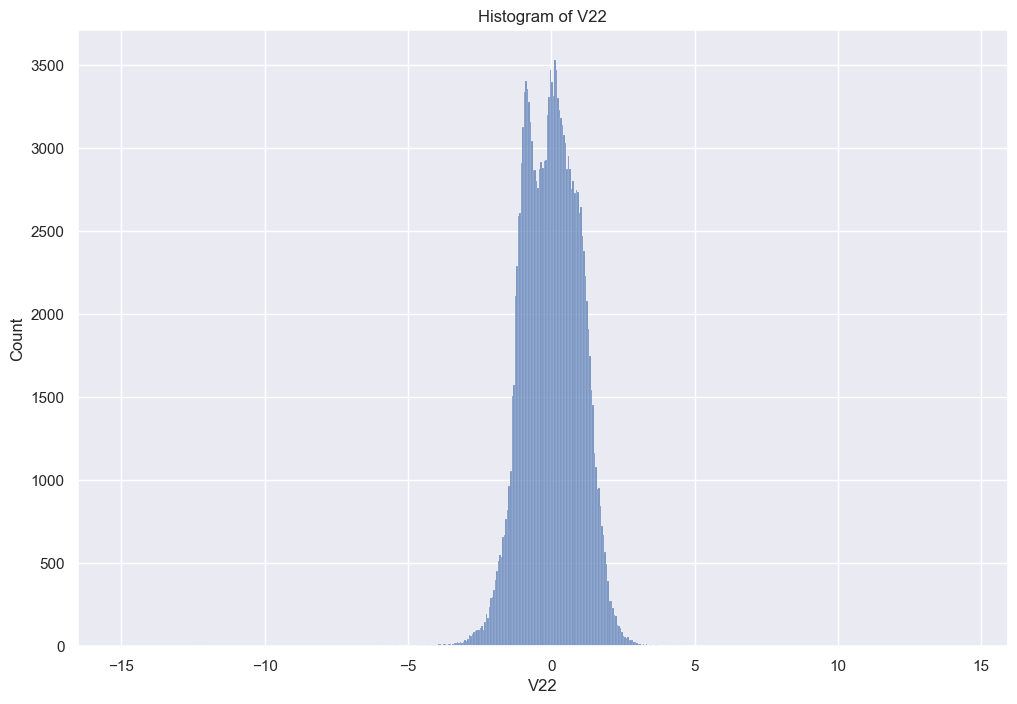

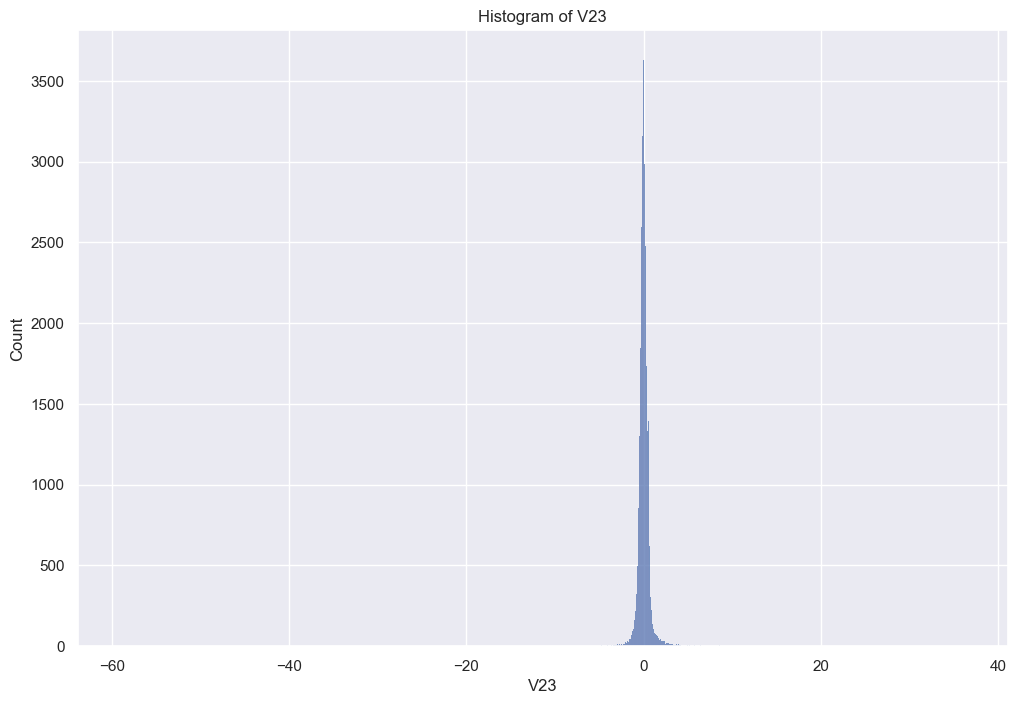

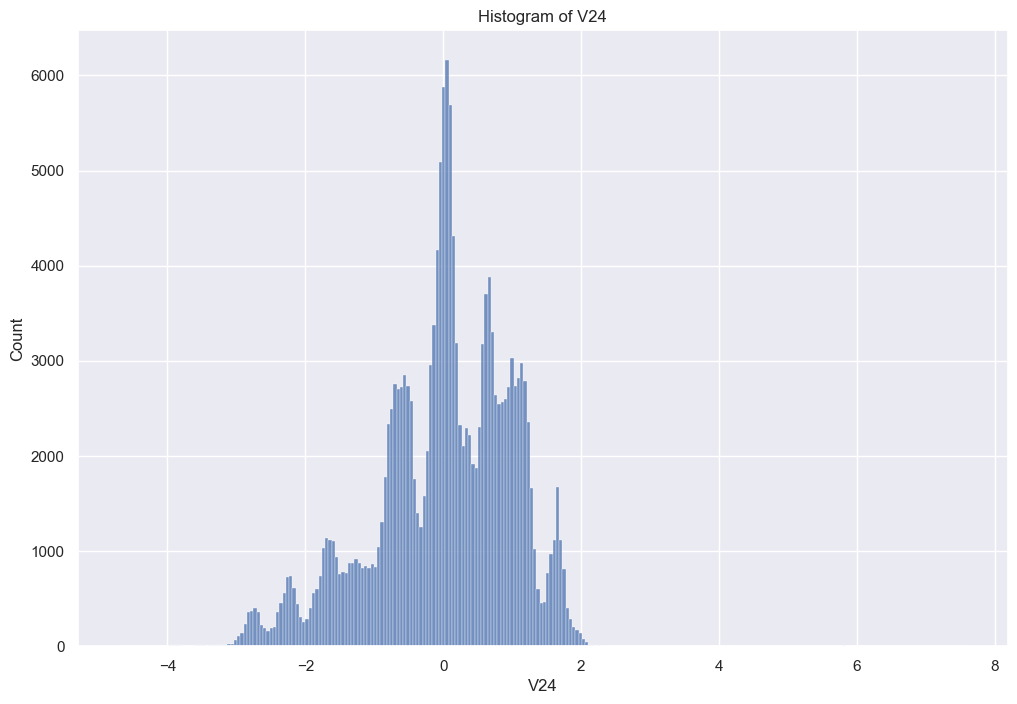

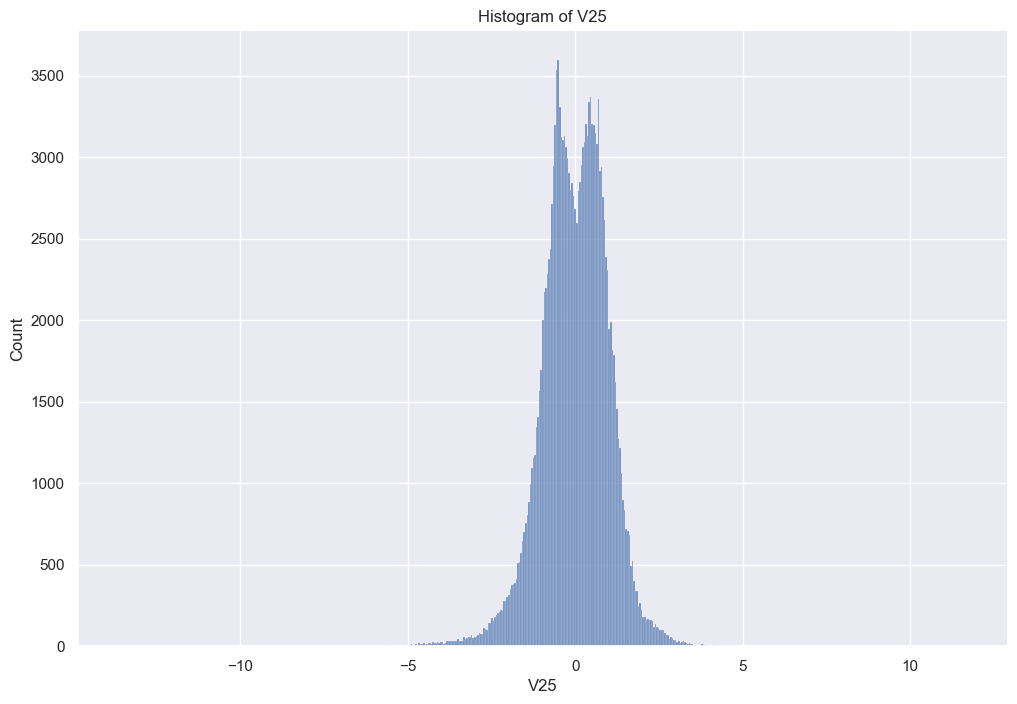

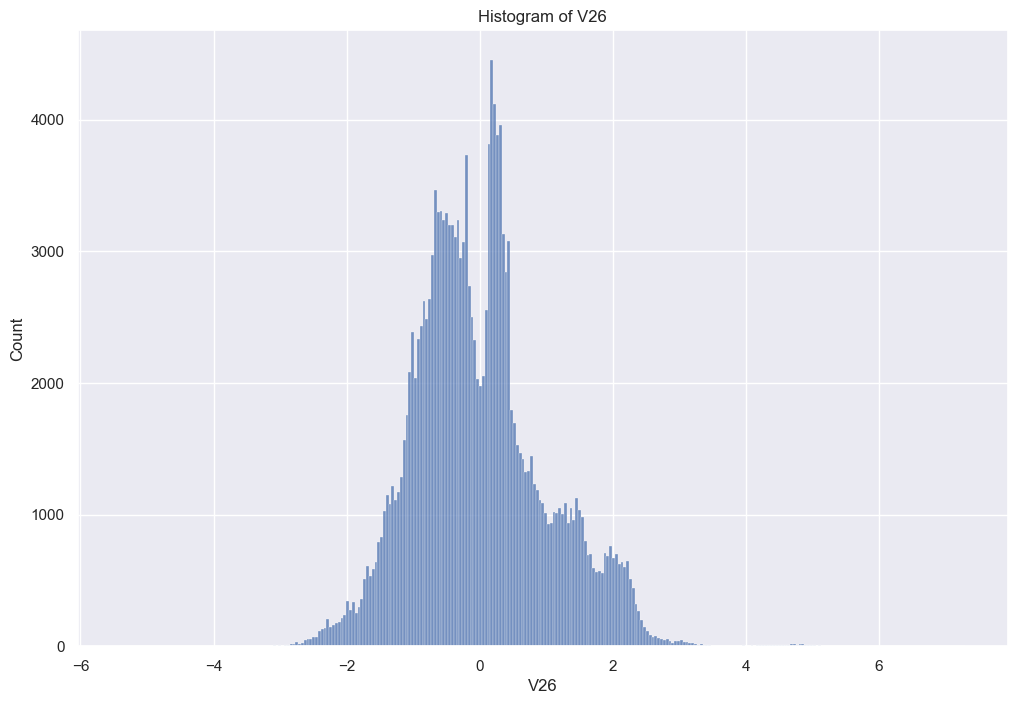

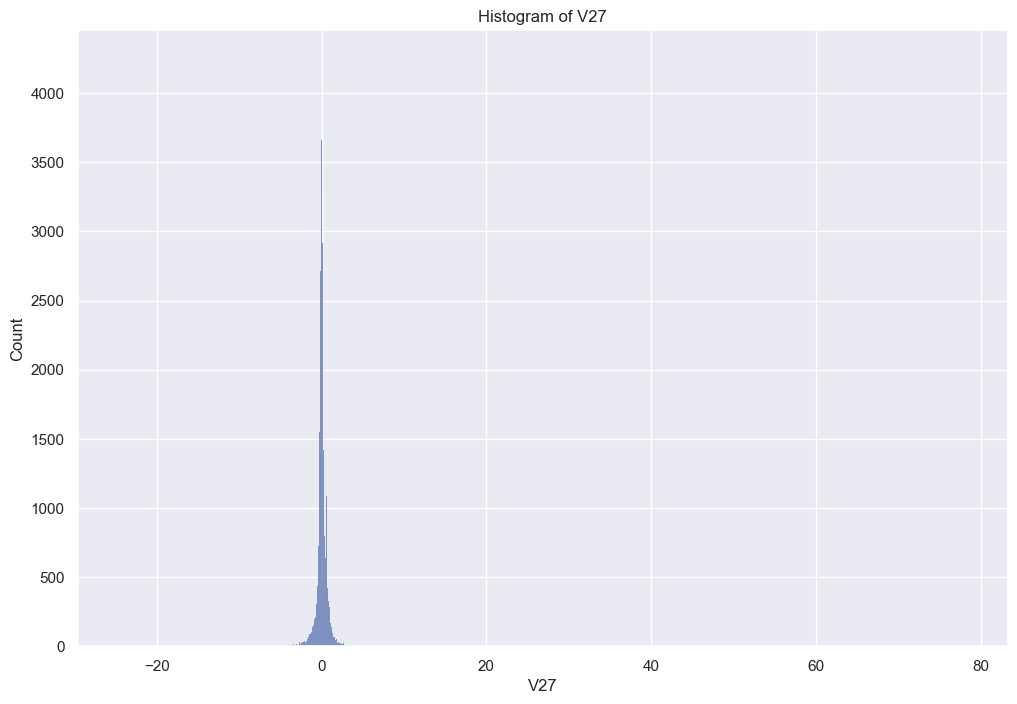

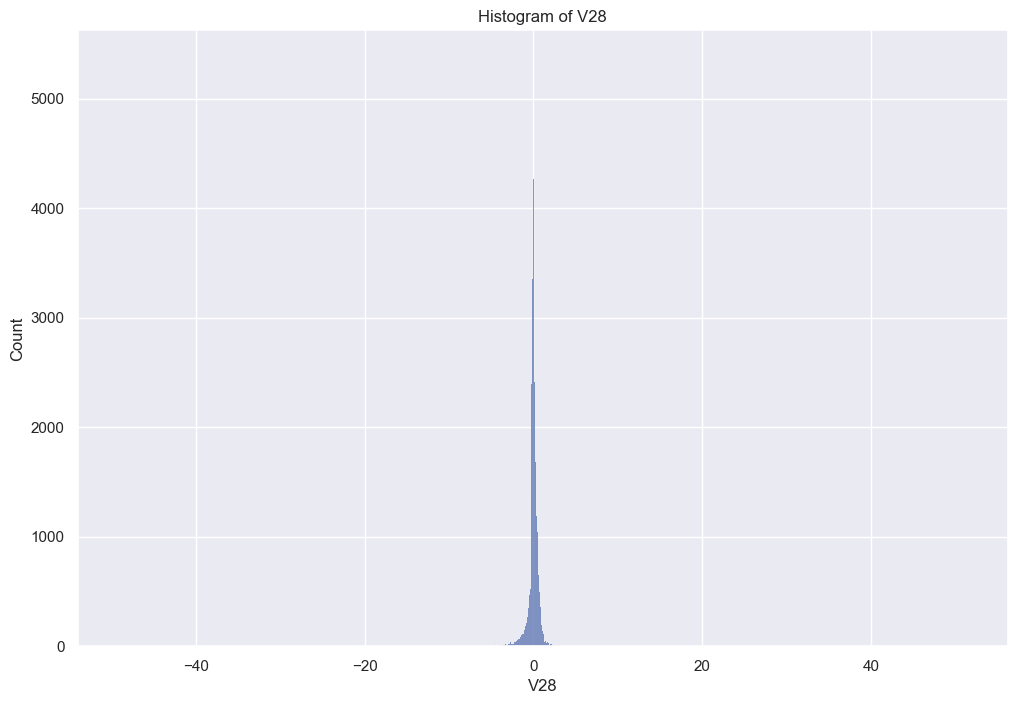

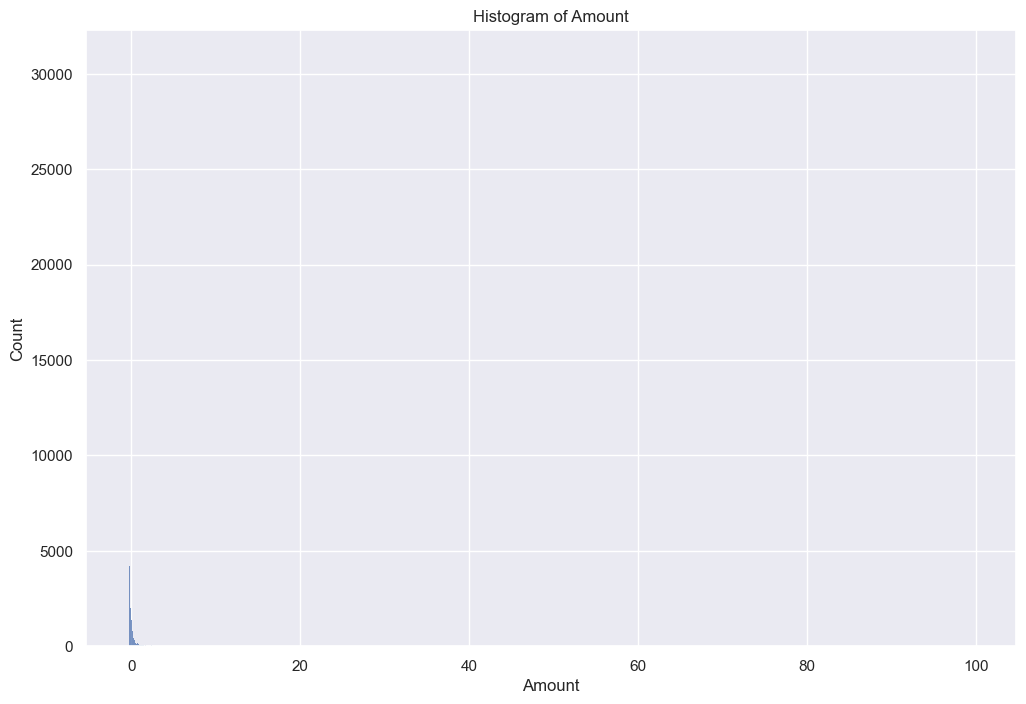

In [10]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for i, column in enumerate(features):
    plt.figure(figsize=(12, 8))
    sns.histplot(train[column], kde=False)
    plt.title(f'Histogram of {column}')
    plt.show()


In [11]:
train['Amount'] = np.log1p(train["Amount"])
train['Time'] = np.log1p(train["Time"])

### target feature 

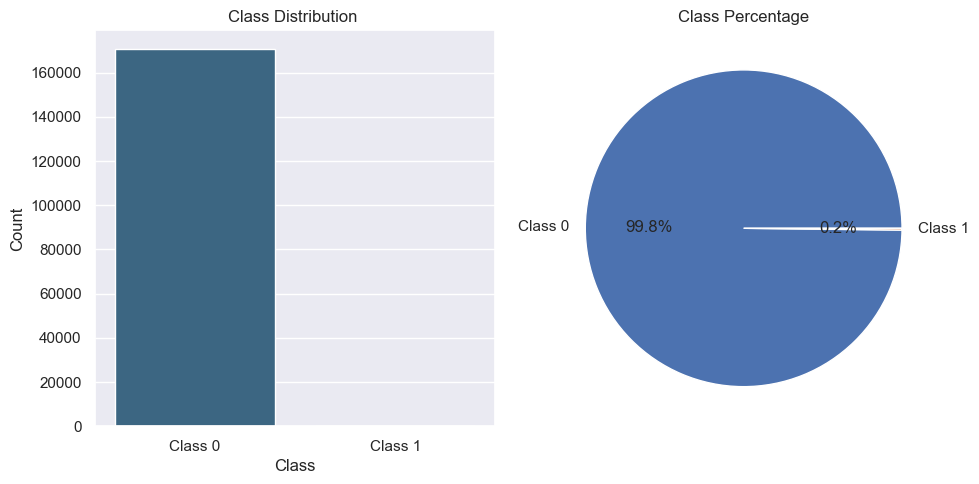

In [12]:
class_counts = train['Class'].value_counts()

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution ')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])

plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=['Class 0', 'Class 1'], autopct='%1.1f%%')
plt.title('Class Percentage')


plt.tight_layout()
plt.show()

- The distribution of the 'Class' feature is highly imbalanced, with Class 0 making up 99.8% of the data, 
and Class 1 only 0.2%. This severe imbalance can lead to overfitting and a significant bias toward Class 0 in 
machine learning models, as the model will likely exhibit bias towards predicting Class 0 due to its overwhelming presence in the dataset. 
To address this, I will apply techniques like OverSampling, UnderSampling, or a combination of UnderSampling followed by OverSampling 
to balance the classes and improve the model's performance.

In [13]:
def Get_Sampler(train, target_column='Class', option=2, ratio=0.02, size=None):
    
    """
    Function to apply sampling strategies on a dataset to handle class imbalance.
    Parameters:
    - train: DataFrame containing the data (including the target column).
    - target_column: The column name of the target variable.
    - option: Sampling strategy option (1: Oversampling, 2: Undersampling, 3: Undersampling + Oversampling).
    - ratio: Desired ratio of the positive class after sampling.
    - size: Total desired size of the dataset after sampling. If None, uses the original size.

    Returns:
    - train_resampled: DataFrame containing resampled data with the same column names.
    """
    X_train = train.drop(target_column, axis=1) 
    y_train = train[target_column]  
    
    # Determine the desired size of the dataset
    original_size = len(y_train)
    size = size if size else original_size
    
    # Calculate the number of positive and negative samples based on the ratio
    size_of_positive = int(ratio * size)
    size_of_negative = int((1 - ratio) * size)

    # Define samplers for each option
    Sampler = {
        1: Pipeline(steps=[('sampler', RandomOverSampler(sampling_strategy={1: size_of_positive}, random_state=42))]),
        2: Pipeline(steps=[('sampler', RandomUnderSampler(sampling_strategy={0: size_of_negative}, random_state=42))]),
        3: Pipeline(steps=[
            ('under_sampler', RandomUnderSampler(sampling_strategy={0: size_of_negative}, random_state=42)),
            ('over_sampler', RandomOverSampler(sampling_strategy={1: size_of_positive}, random_state=42))
        ])
    }

    # Apply the selected sampling method
    X_resampled, y_resampled = Sampler[option].fit_resample(X_train, y_train)

    # Combine resampled features and target into a single DataFrame
    train_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
    train_resampled[target_column] = y_resampled

    return train_resampled


In [14]:
train=Get_Sampler(train,option=1)

### visualize features vs target

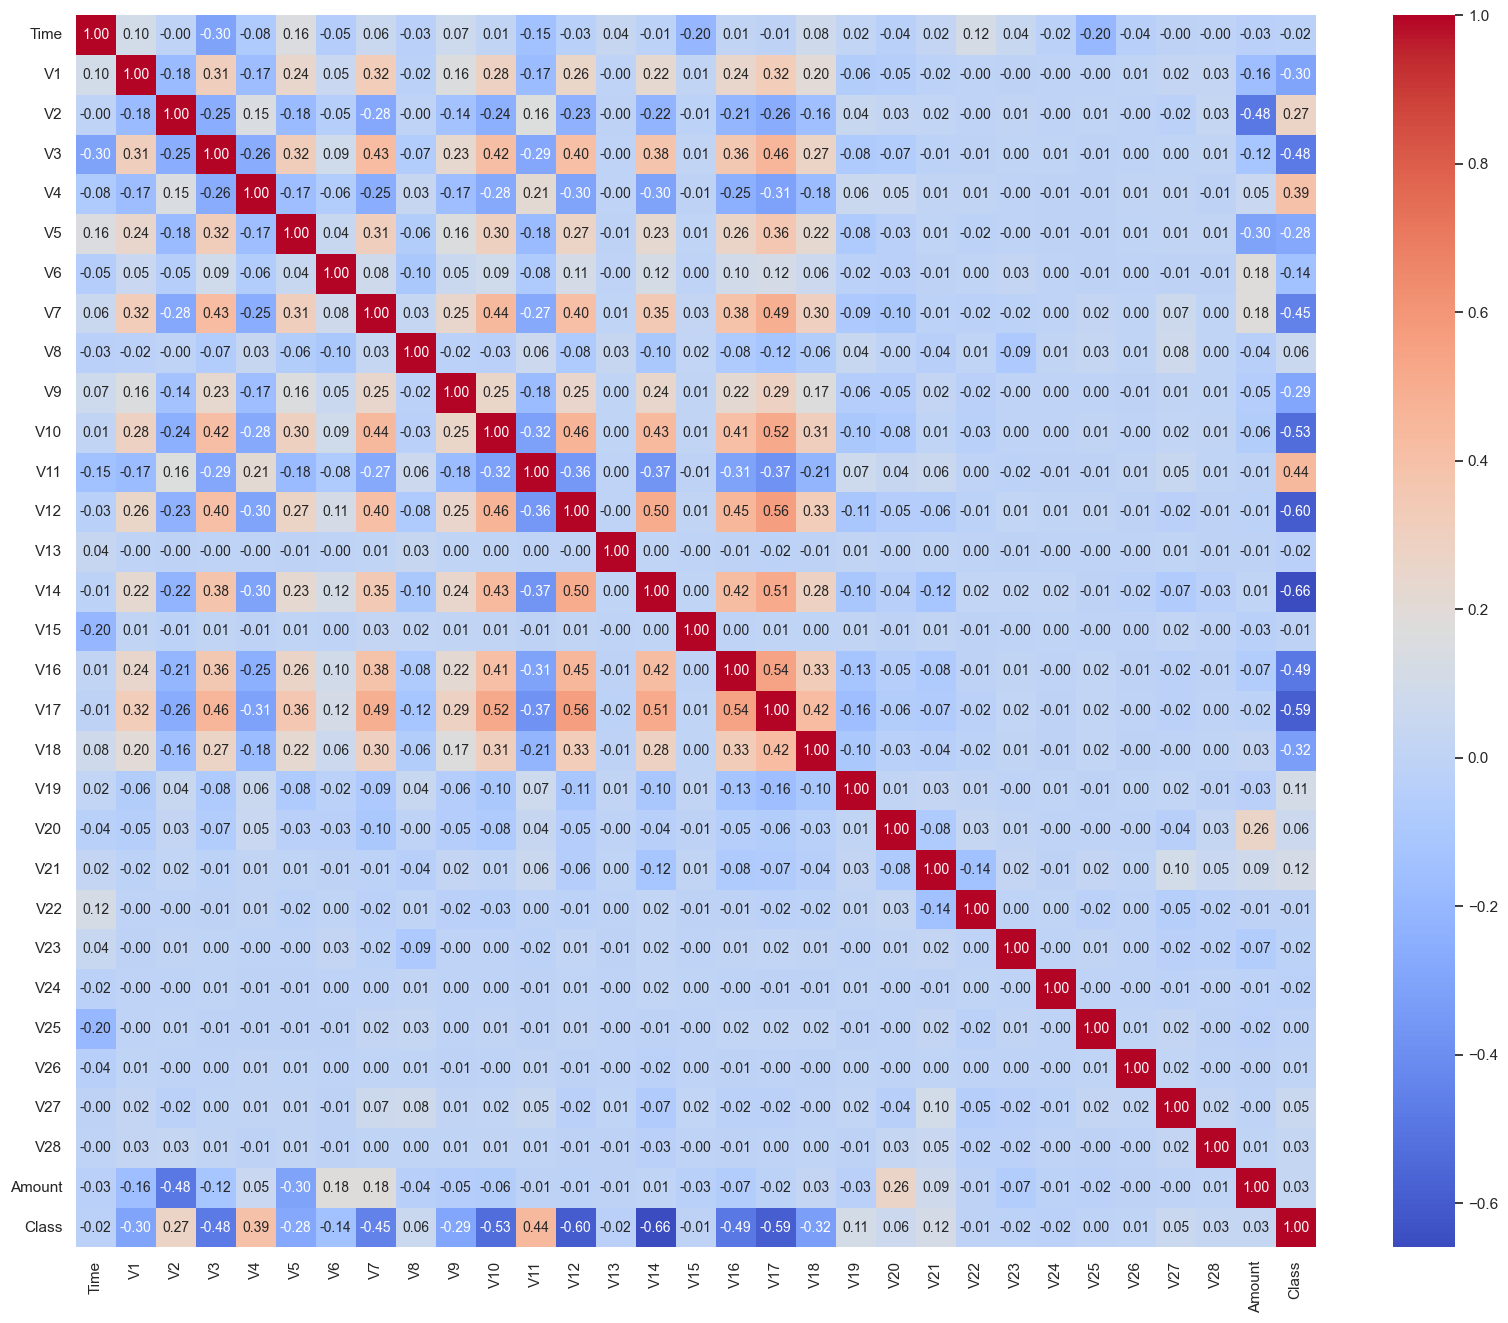

In [15]:
plt.figure(figsize=(20, 16)) 
sns.heatmap(data=train.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.show()


### we finshed the EDA to understand the data and that's the time for the model